In [301]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.rcParams["figure.dpi"] = 120

# Funciones Auxiliares

In [302]:
def riffle(*args):
    "riffle('ABC','abc',123') -> ['A', 'a', '1', 'B', 'b', '2', 'C', 'c', '3']"
    return [i for level in zip(*args) for i in level]

def TorchMLPerceptron(layer_sizes, activation_function=nn.ReLU()):
    "Builds an multilayer perceptron chaining together several linear layers, and intertwining the same activation function"
    activators = [activation_function]*len(layer_sizes)
    linear_layers = [nn.Linear(inp,out) for inp,out in zip(layer_sizes,layer_sizes[1:])]
    layers = riffle(linear_layers,activators)
    return nn.Sequential(*layers[:-1])

# Decargar los datos

In [303]:
import requests

url = "https://raw.githubusercontent.com/ComputoCienciasUniandes/IntroDeepLearning_202102/main/datos/MLP_regresion.csv"
fname = url.split("/")[-1]

with open(fname,"w") as file:
    file.write(requests.get(url).text)

# Importar los datos

In [304]:
x,y = np.loadtxt("MLP_regresion.csv",skiprows=1,delimiter=",").T 
X = torch.tensor([x],dtype=torch.float).T
Y = torch.tensor([y],dtype=torch.float).T

# Primer intento de modelo

In [437]:
model = TorchMLPerceptron([1,5,10,20,30,20,10,5,1])

loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=5e-2)

epochs = np.arange(3000)
losses = np.zeros(len(epochs))

for i in tqdm(range(len(epochs)),ncols=80):
    loss = loss_function(model(X),Y)
    losses[i] = loss.item()
    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

100%|██████████████████████████████████████| 3000/3000 [00:07<00:00, 384.53it/s]


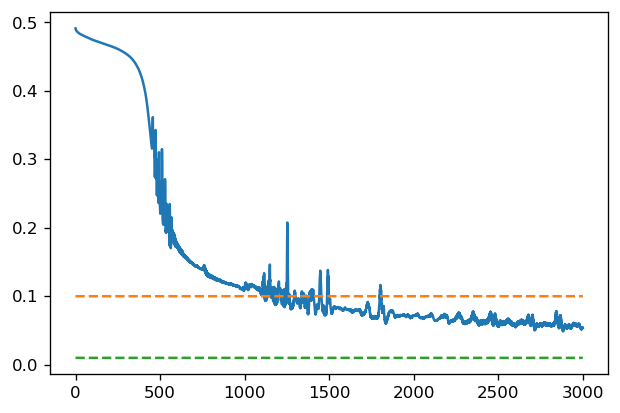

In [438]:
plt.plot(epochs,losses)
plt.plot(epochs,np.ones_like(epochs)/10,"--")
plt.plot(epochs,np.ones_like(epochs)/100,"--")

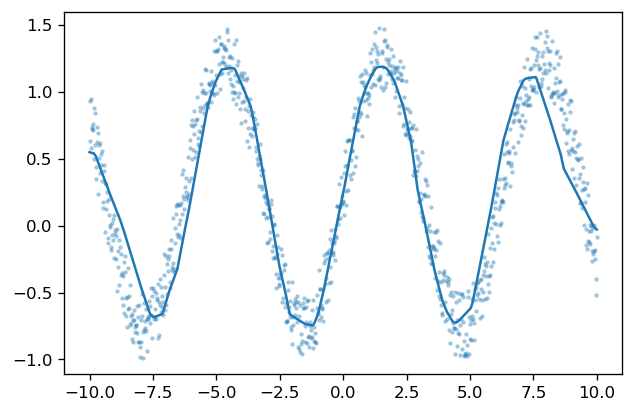

In [439]:
plt.scatter(x,y,s=3,alpha=0.3)
plt.plot(x,(model(X).data.numpy().T)[0])

# Segundo intento

In [448]:
model = TorchMLPerceptron([1,50,50,1])

loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=5e-2)

epochs = np.arange(3000)
losses = np.zeros(len(epochs))

for i in tqdm(range(len(epochs)),ncols=100):
    loss = loss_function(model(X),Y)
    losses[i] = loss.item()
    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

100%|██████████████████████████████████████████████████████████| 3000/3000 [00:05<00:00, 592.43it/s]


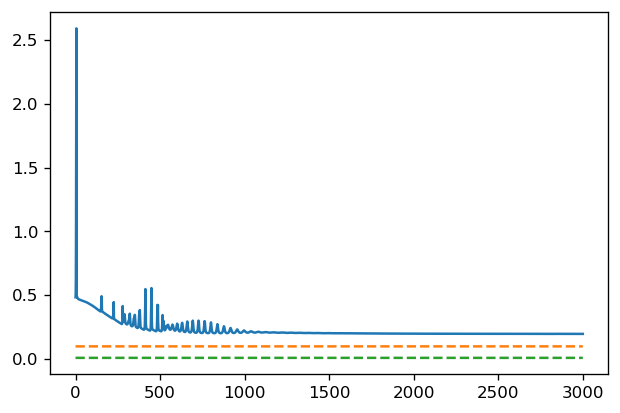

In [449]:
plt.plot(epochs,losses)
plt.plot(epochs,np.ones_like(epochs)/10,"--")
plt.plot(epochs,np.ones_like(epochs)/100,"--")

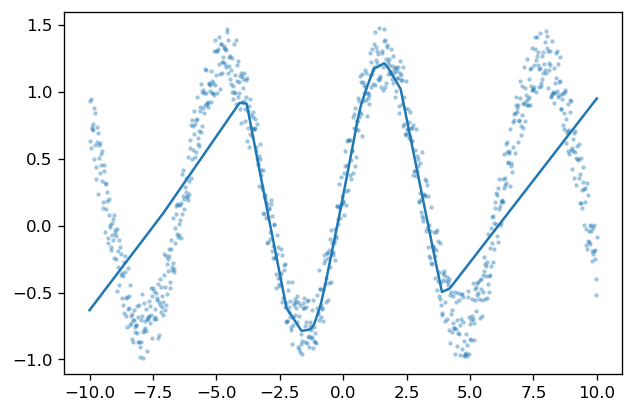

In [450]:
plt.scatter(x,y,s=3,alpha=0.3)
plt.plot(x,(model(X).data.numpy().T)[0])

# Comparativa

A pesar de que las ANN tenían la misma cantidad de neuronas, 
la primera (que tenía más capas, y por tanto más conexiones) mostró mejores resultados: llegó rápidamente a < 0.1 loss, y se ajustó mejor a la curva.
La segunda red, sólo con dos capas, nunca llegó a < 0.1 loss, pero ajustó correctamente el centro de la curva.

Esto parece la progresión de una serie de taylor alrededor de cero, de hecho:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Sintay_SVG.svg/600px-Sintay_SVG.svg.png">